In [3]:
# when you change the code of .py document in the ecolab package, you have to restart the kernel of jupyter notebook and 
# run the below import code again to make sure the newest change involved.

import numpy as np
import numba
from ecolab import run_ecolab
from ecolab.environment import Environment
from ecolab.agents import Rabbit, RHD_Status
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
import matplotlib.pyplot as plt

In [4]:
# create the environment
env = Environment(shape = [10,10])

In [5]:
def generate_agents(Total_agents = 100, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1):
    ''' A function to output agents based on user defined variables
    Total_agents - Total number of agents
    prop_infants - Proportion of infants based on total agents
    prop_adults - Proportion of adults based on total agents
    prop_infected - Proportion of infected adults based on total number of adults
    Output: a list of agents'''
    
    N_infants = round(prop_infants*Total_agents)
    N_sus_adults = round(prop_adults*(Total_agents-N_infants))
    N_infected_adults = round(prop_infected*prop_adults*Total_agents)
    agents = []
    
    for i in range(N_infants):
        infant = Rabbit(age = np.random.randint(0,90), position = env.get_random_location()) ## age < 90 => infants
        agents.append(infant)
    for i in range(N_sus_adults):
        adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location())
        agents.append(adult)
    for i in range(N_infected_adults):
        infected_adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location(), infected=True)
        agents.append(infected_adult)
        
    return agents

In [48]:
def batch_simulation(Total_agents=100, prop_infants=0.1, prop_adults=0.9, prop_infected=0.1, num_model_runs=10):
    ''' A function to run the ecolab simulation several times to account for stochasticity
    It outputs the mean, standard deviation, and confidence interval of the proportion of infected rabbits '''
    
    batch_mean_infected = []
    
    for i in range(num_model_runs):
        agents = generate_agents(Total_agents=Total_agents, prop_infants=prop_infants,prop_adults=prop_adults,prop_infected=prop_infected)
        sus, infected, immune, total, infant, agents = run_ecolab(env, agents, Niteration=[0, 365], max_density = 10)
        batch_prop_infected = np.divide(infected, total)
        batch_mean_infected.append(batch_prop_infected)
    
    return batch_mean_infected

In [43]:
def average_arrays(arr, runs=10):
    ''' A function to average the time series array by the number of simulation runs'''
    
    avg_array = (arr[0] + arr[1] + arr[2] + arr[3] + arr[4] + arr[5] + arr[6] + arr[7] + arr[8] + arr[9])/runs
    
    return avg_array

In [44]:
def summary_statistics(arr):
    ''' A function to output various summary statistics. The input is the averaged array'''
    mean = np.mean(arr)
    std = np.std(arr)
    ci_low = mean - (1.96 * std / sqrt(len(arr)))
    ci_high = mean + (1.96 * std / sqrt(len(arr)))
    
    return mean, std, ci_low, ci_high

In [49]:
batch_mean_infected_25 = batch_simulation(Total_agents = 25, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10)
ave_array_25 = average_arrays(batch_mean_infected_25)
mean_25, std_25, ci_low_25, ci_high_25 = summary_statistics(ave_array_25)
print(f'The mean proportion of infected rabbits under an initialised population of 25 is: {mean_25:.4f}')
print(f'The standard deviation is: {std_25:.4f}')
print(f'It follows that the 95% confidence intervals are: {ci_low_25:.4f} and {ci_high_25:.4f}')

The mean proportion of infected rabbits under an initialised population of 25 is: 0.0361
The standard deviation is: 0.0307
It follows that the 95% confidence intervals are: 0.0329 and 0.0392


In [52]:
batch_mean_infected_50 = batch_simulation(Total_agents = 50, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10)
ave_array_50 = average_arrays(batch_mean_infected_50)
mean_50, std_50, ci_low_50, ci_high_50 = summary_statistics(ave_array_50)
print(f'The mean proportion of infected rabbits under an initialised population of 50 is: {mean_50:.4f}')
print(f'The standard deviation is: {std_50:.4f}')
print(f'It follows that the 95% confidence intervals are: {ci_low_50:.4f} and {ci_high_50:.4f}')

The mean proportion of infected rabbits under an initialised population of 50 is: 0.0414
The standard deviation is: 0.0655
It follows that the 95% confidence intervals are: 0.0347 and 0.0481


In [51]:
batch_mean_infected_100 = batch_simulation(Total_agents = 100, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10)
ave_array_100 = average_arrays(batch_mean_infected_100)
mean_100, std_100, ci_low_100, ci_high_100 = summary_statistics(ave_array_100)
print(f'The mean proportion of infected rabbits under an initialised population of 100 is: {mean_100:.4f}')
print(f'The standard deviation is: {std_100:.4f}')
print(f'It follows that the 95% confidence intervals are: {ci_low_100:.4f} and {ci_high_100:.4f}')

The mean proportion of infected rabbits under an initialised population of 25 is: 0.0476
The standard deviation is: 0.0997
It follows that the 95% confidence intervals are: 0.0374 and 0.0578


In [53]:
batch_mean_infected_200 = batch_simulation(Total_agents = 200, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1, num_model_runs = 10)
ave_array_200 = average_arrays(batch_mean_infected_200)
mean_200, std_200, ci_low_200, ci_high_200 = summary_statistics(ave_array_200)
print(f'The mean proportion of infected rabbits under an initialised population of 200 is: {mean_200:.4f}')
print(f'The standard deviation is: {std_200:.4f}')
print(f'It follows that the 95% confidence intervals are: {ci_low_200:.4f} and {ci_high_200:.4f}')

The mean proportion of infected rabbits under an initialised population of 200 is: 0.0506
The standard deviation is: 0.1200
It follows that the 95% confidence intervals are: 0.0383 and 0.0629


We should look to test whether the means under the different initial populations are statistically equal to each other

H_0: The two sample means are equal

H_a: The two sample means are not equal

In [55]:
import scipy.stats as stats
# Test between initial population of 25 and 50
t, p = stats.ttest_ind(ave_array_25,ave_array_50, equal_var=False)
t, p

(-1.4097163532840824, 0.15922571788651663)

The p-value is greater than alpha of 0.05 (95% confidence) therefore we fail to reject the null hypothesis. There is no sufficient evidence to conclude that at initial populations of 25 and 50, their proportions of infected rabbits are different

In [56]:
# Test between initial population of 50 and 100
t1,p1 = stats.ttest_ind(ave_array_50,ave_array_100, equal_var=False)
t1,p1

(-0.9922724479166113, 0.32144611349740143)

In [57]:
# Test between initial population of 100 and 200
t2,p2 = stats.ttest_ind(ave_array_100,ave_array_200, equal_var=False)
t2,p2

(-0.3672803023085063, 0.7135202837835721)

In [58]:
# Test between initial population of 25 and 100
t3,p3 = stats.ttest_ind(ave_array_25,ave_array_100, equal_var=False)
t3,p3

(-2.1130499145195722, 0.035169039159006404)

In [59]:
# Test between initial population of 25 and 200
t4,p4 = stats.ttest_ind(ave_array_25,ave_array_200, equal_var=False)
t4,p4

(-2.2414661493308836, 0.02552850223775637)

In [60]:
# Test between initial population of 50 and 200
t5,p5 = stats.ttest_ind(ave_array_50,ave_array_200, equal_var=False)
t4,p4

(-2.2414661493308836, 0.02552850223775637)

Text(0.5, 1.0, 'Figure 1. Proportion of Infected Rabbits for Each Initial Population Size')

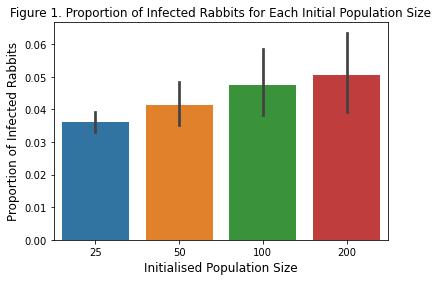

In [62]:
import seaborn as sns
xlabels = [25, 50, 100, 200]
g = sns.barplot(data = [ave_array_25, ave_array_50, ave_array_100, ave_array_200])
g.set_xticklabels(xlabels)
g.set_xlabel("Initialised Population Size", fontsize = 12)
g.set_ylabel("Proportion of Infected Rabbits", fontsize = 12)
g.set_title('Figure 1. Proportion of Infected Rabbits for Each Initial Population Size')

In [9]:
agents_25 = generate_agents(Total_agents = 25, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1)

In [10]:
sus_25, infected_25, immune_25, total_25, infant_25, agents25 = run_ecolab(env, agents_25, Niteration=[0, 365], max_density = 10)

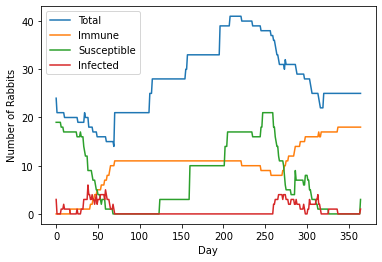

In [12]:
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(total_25, label='Total')
ax.plot(immune_25, label='Immune')
ax.plot(sus_25, label='Susceptible')
ax.plot(infected_25, label='Infected')
plt.xlabel('Day')
plt.ylabel('Number of Rabbits')
plt.savefig('time_series_25.png')
leg = ax.legend();

In [15]:
agents_200 = generate_agents(Total_agents = 200, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1)
sus_200, infected_200, immune_200, total_200, infant_200, agents200 = run_ecolab(env, agents_200, Niteration=[0, 365], max_density = 10)

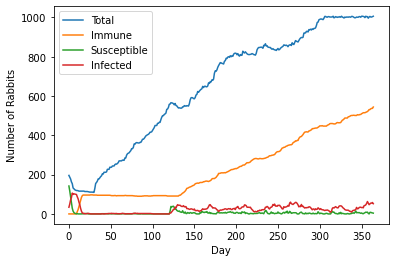

In [16]:
fig, ax = plt.subplots()
ax.plot(total_200, label='Total')
ax.plot(immune_200, label='Immune')
ax.plot(sus_200, label='Susceptible')
ax.plot(infected_200, label='Infected')
plt.xlabel('Day')
plt.ylabel('Number of Rabbits')
plt.savefig('time_series_200.png')
leg = ax.legend();

In [27]:
agents_50 = generate_agents(Total_agents = 50, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1)
sus_50, infected_50, immune_50, total_50, infant_50, agents50 = run_ecolab(env, agents_50, Niteration=[0, 365], max_density = 10)

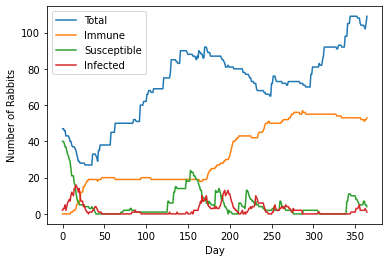

In [36]:
fig, ax = plt.subplots()
ax.plot(total_50, label='Total')
ax.plot(immune_50, label='Immune')
ax.plot(sus_50, label='Susceptible')
ax.plot(infected_50, label='Infected')
plt.xlabel('Day')
plt.ylabel('Number of Rabbits')
plt.savefig('time_series_50.png')
leg = ax.legend();

In [29]:
agents_100 = generate_agents(Total_agents = 100, prop_infants=0.1, prop_adults = 0.9, prop_infected = 0.1)
sus_100, infected_100, immune_100, total_100, infant_100, agents100 = run_ecolab(env, agents_100, Niteration=[0, 365], max_density = 10)

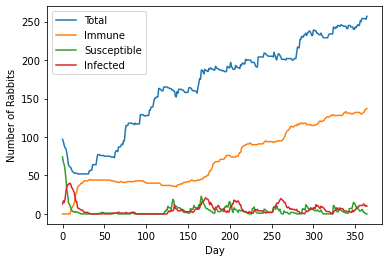

In [35]:
fig, ax = plt.subplots()
ax.plot(total_100, label='Total')
ax.plot(immune_100, label='Immune')
ax.plot(sus_100, label='Susceptible')
ax.plot(infected_100, label='Infected')
plt.xlabel('Day')
plt.ylabel('Number of Rabbits')
plt.savefig('time_series_100.png')
leg = ax.legend();

In [31]:
# Exploratory data analyis
print("The number of rabbits in the population at the end of the year when initialised at 25:", total_25[364])
print("The number of rabbits in the population at the end of the year when initialised at 200:", total_200[364])
print("The number of rabbits in the population at the end of the year when initialised at 50:", total_50[364])
print("The number of rabbits in the population at the end of the year when initialised at 100:", total_100[364])

The number of rabbits in the population at the end of the year when initialised at 25: 25
The number of rabbits in the population at the end of the year when initialised at 200: 1006
The number of rabbits in the population at the end of the year when initialised at 50: 109
The number of rabbits in the population at the end of the year when initialised at 100: 257
